In [1]:
import matplotlib.pyplot as plt

#### Sigmoide

É a mesma função usada no algoritmo de regrassão logística. Essa função recebe qualquer valor real e retorna valores entre 0 e 1. Quanto maior a entrada (mais positiva), mais próxima de 1 o valor ser, enquanto quanto mais negativa a entrada, mais próxima de 0.

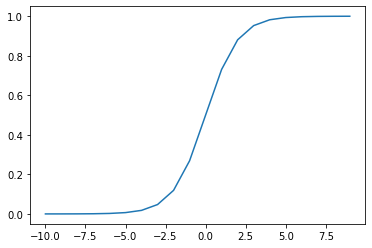

In [2]:
from math import exp 

def sigmoid(x):
    return 1.0 / (1.0 + exp(-x))

inputs = [x for x in range(-10, 10)]

outputs = [sigmoid(x) for x in inputs]

plt.plot(inputs, outputs)
plt.show()

#### ReLU (rectified linear activation function)

É a função de ativação mais usada hoje. Foi introduzida como solução de um problema chamado vanishing gradient.

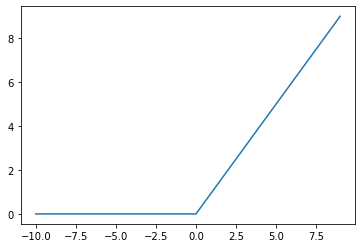

In [3]:
def relu(x):
    return max(0.0, x)

inputs = [x for x in range(-10, 10)]

outputs = [relu(x) for x in inputs]

plt.plot(inputs, outputs)
plt.show()

#### Tanh (rectified linear activation function)

A tangente hiperbólica é muito similar à sigmoide, porém mapeia a entrada de -1 a 1.

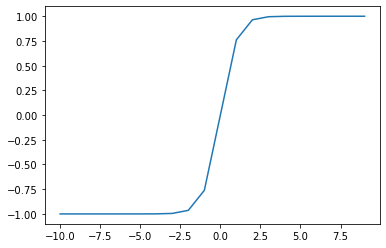

In [4]:
def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

inputs = [x for x in range(-10, 10)]

outputs = [tanh(x) for x in inputs]

plt.plot(inputs, outputs)
plt.show()

#### Perceptron multilayer para regressão

Um perceptron multicamadas é uma rede neural com uma ou mais camadas ocultas com um número indeterminado de neurônios.

In [5]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, noise = 0.1, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y), 1))

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state=42)

In [13]:
# descida estocástica de gradiente

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import RootMeanSquaredError as rmse
def create_model(loss):
    model = Sequential()
    model.add(Dense(25, input_dim = 20, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'linear'))
    opt = SGD(lr = 0.01, momentum = 0.9)
    model.compile(loss = loss, optimizer = opt, metrics = ['mse'])
    return model 

#### Erro quadrático médio - Mean Squared Error (MSE)

MSE é calculado tirando a média dos quadrados da diferença entre os valores preditos e os verdadeiros. O resultado é sempre positivo, onde o valor ideal é 0. A operação de elevar ao quadrado diz garante que predições com maior erro tenham maior peso no valor final.

In [14]:
model = create_model('mean_squared_error')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs = 100, verbose = 0)

In [15]:
train_mse = model.evaluate(train_X, train_y, verbose=0)
test_mse = model.evaluate(test_X, test_y, verbose=0)

Train: [0.0013951233122497797, 0.0013951233122497797]
Test: [0.003984704148024321, 0.003984704148024321]


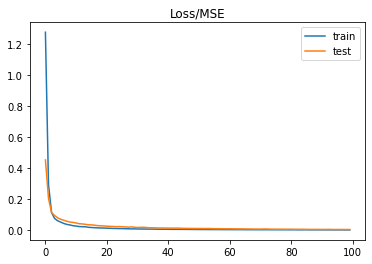

In [16]:
print(f'Train: {train_mse}')
print(f'Test: {test_mse}' )

plt.title('Loss/MSE')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

Podemos ver que o modelo converge rapidamente e tanto a performance de treino e de teste ficam equivalentes. Essa performance e convergência sugerem que MSE é uma boa função de custo para nosso modelo. Porém vamos testar outros modelos para regressão.

#### Erro quadrático médio logaritmico - Mean Squared Logarithmic Error (MSLE)

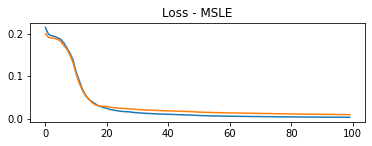

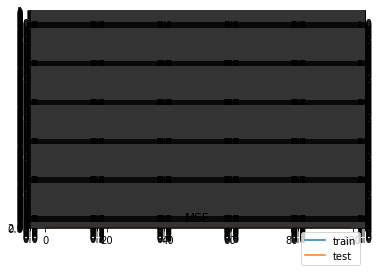

In [17]:
model = create_model('mean_squared_logarithmic_error')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs = 100, verbose = 0)

train_mse = model.evaluate(train_X, train_y, verbose=0)
test_mse = model.evaluate(test_X, test_y, verbose=0)

plt.subplot(211)
plt.title('Loss - MSLE')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.subplots(212)
plt.title('MSE')
plt.plot(history.history['mse'], label = 'train')
plt.plot(history.history['val_mse'], label = 'test')
plt.legend()
#plt.tight_layout()
plt.show()

In [18]:
# modelo classificação binária

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)


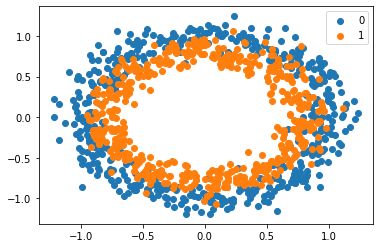

In [19]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label = 0)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 1)
plt.legend()

#### Entropia binária cruzada

Já vimos que a entropia cruzada é a função de perda padrão e no caso de redes neurais não seria diferente. Lembrando que a entropia cruzada calcula um score que resume a diferença média entre as distribuições de probabilidade reais e preditas para classe 1. Por isso, o output da nossa rede neural deve ser a probabilidade de um elemento ser da classe 1. Além disso, o score ideal é 0.

In [20]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate= 0.01, momentum=0.9)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 200, verbose = 0)



In [21]:
_, train_acc = model.evaluate(X_train, y_train, verbose = 0)
_, test_acc = model.evaluate(X_test, y_test, verbose = 0)

print(f'Test acc: {test_acc}')
print(f'Train acc: {train_acc}')


Test acc: 0.843999981880188
Train acc: 0.843999981880188


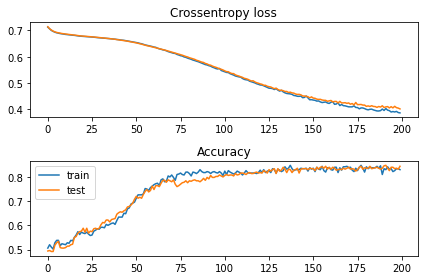

In [22]:
plt.subplot(211)
plt.title('Crossentropy loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')

plt.tight_layout()

plt.legend()